<a href="https://colab.research.google.com/github/Amogh-S-Acharya/Fifth_Sem_ML_Lab/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Load the MNIST dataset with version 'active'
mnist = fetch_openml('mnist_784', version='active', as_frame=False)
X, y = mnist.data, mnist.target

# Filter for digits 0 and 1
zero_one_mask = np.isin(y, ['0', '1'])
X_filtered = X[zero_one_mask]
y_filtered = y[zero_one_mask]

# Convert target labels to integers
y_filtered_int = y_filtered.astype(int)

# Normalize pixel values
X_normalized = X_filtered / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_filtered_int, test_size=0.2, random_state=42)

print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing labels:", y_test.shape)

Shape of training data: (11824, 784)
Shape of testing data: (2956, 784)
Shape of training labels: (11824,)
Shape of testing labels: (2956,)


In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
model = LogisticRegression()

# Train the logistic regression model
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000


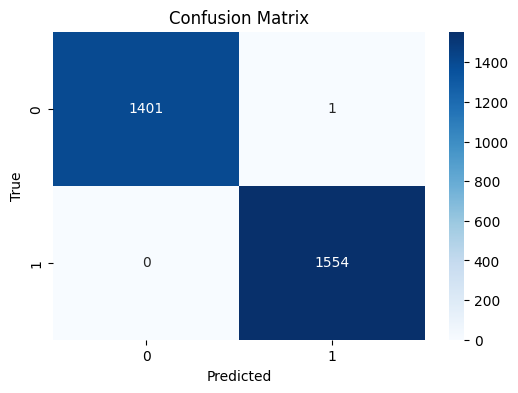

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

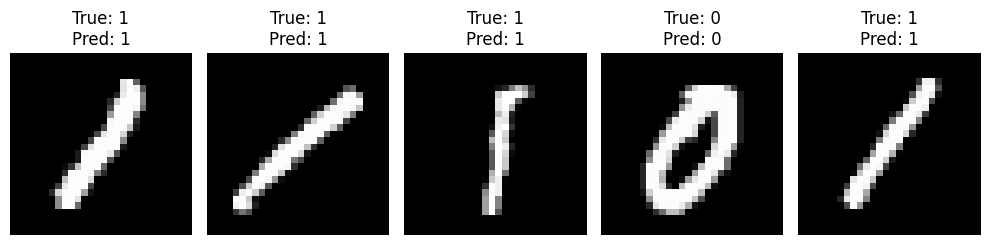

In [10]:
import random
import matplotlib.pyplot as plt

# Select a few random indices from the test set
random_indices = random.sample(range(len(X_test)), 5)

# Get the images, true labels, and predicted labels for these indices
random_images = X_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = y_pred[random_indices]

# Reshape the images back to their original 28x28 format
random_images_reshaped = random_images.reshape(-1, 28, 28)

# Display the images and their predictions
plt.figure(figsize=(10, 5))
for i in range(len(random_indices)):
    plt.subplot(1, len(random_indices), i + 1)
    plt.imshow(random_images_reshaped[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()